In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from ast import literal_eval
from scipy.stats import entropy

sns.set()

In [2]:
# Load genre meta-annotations
g = pd.read_csv('../../data/wiki_art_genre_class.csv')

In [3]:
# load histograms of emotion choices you created with extract_emotion_histogram_per_image.ipynb
image_hists_file = '../../data/image-emotion-histogram.csv'
image_hists = pd.read_csv(image_hists_file)

image_hists.emotion_histogram = image_hists.emotion_histogram.apply(literal_eval)
image_hists.emotion_histogram = image_hists.emotion_histogram.apply(lambda x: (np.array(x) / float(sum(x))).astype('float32'))
image_hists['entropy'] = image_hists.emotion_histogram.apply(entropy)

image_hists.groupby('art_style')['entropy'].mean().sort_values()

art_style
Impressionism                 0.987322
Pointillism                   0.997175
Post_Impressionism            1.032607
Realism                       1.041415
Romanticism                   1.048130
Symbolism                     1.062376
Rococo                        1.083472
Baroque                       1.086846
Contemporary_Realism          1.091084
Naive_Art_Primitivism         1.095102
New_Realism                   1.100495
Mannerism_Late_Renaissance    1.101214
Early_Renaissance             1.101644
Fauvism                       1.104155
Northern_Renaissance          1.104570
High_Renaissance              1.108746
Art_Nouveau_Modern            1.109310
Pop_Art                       1.111451
Ukiyo_e                       1.115358
Minimalism                    1.120483
Expressionism                 1.133034
Cubism                        1.181123
Color_Field_Painting          1.190317
Abstract_Expressionism        1.226439
Analytical_Cubism             1.227452
Synthetic_Cubis

In [5]:
m = pd.merge(image_hists, g, on=['art_style', 'painting'])

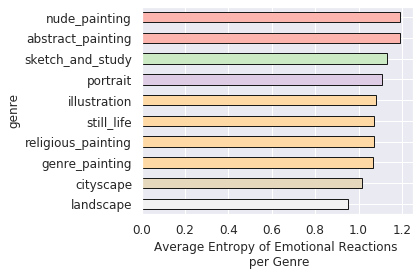

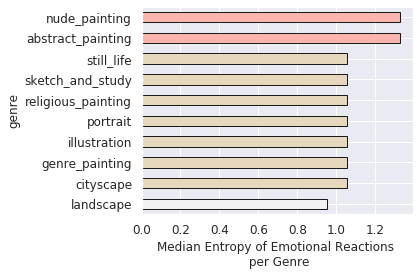

In [6]:
pallete = plt.cm.Pastel1_r

for stat in ['average', 'median']:
    if stat == 'average':
        s = m.groupby('genre')['entropy'].mean().sort_values()
    else:
        s = m.groupby('genre')['entropy'].median().sort_values()    

    plt.figure()
    norm = plt.Normalize(s.min(), s.max())
    colors = pallete(norm(s.values))
    ax = s.plot.barh(grid=True, color=colors, ec="k", fontsize=12)
    xlabel = '{} Entropy of Emotional Reactions \n per Genre'.format(stat.capitalize())
    ax.set_xlabel(xlabel)
    plt.tight_layout()    
    plt.savefig('ArtEmis_entropy_emo_reactions_per_Genre_{}.jpg'.format(stat.capitalize()))